In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression


In [3]:
df = pd.read_csv("patents_cleaned.csv")
df.head()

,Unnamed: 0,patent_number,patent_title,patent_kind,patent_type,patent_year,patent_date,patent_abstract,patent_firstnamed_assignee_city,patent_firstnamed_assignee_country,...,patent_firstnamed_inventor_state,patent_num_cited_by_us_patents,patent_num_combined_citations,patent_num_foreign_citations,patent_num_us_application_citations,patent_num_us_patent_citations,patent_num_claims,detail_desc_length,patent_processing_time,patent_average_processing_time
0,0,10001775,Machine learning systems and techniques to opt...,B2,utility,2018,2018-06-19,"A system, an apparatus or a process may be con...",Foster City,US,...,CA,0,128,8,102,18,21,149708.0,538,871.0
1,1,10004112,Machine learning apparatus and coil electric h...,B2,utility,2018,2018-06-19,A machine learning apparatus includes a state ...,Yamanashi,JP,...,Foreigner,1,15,10,2,3,6,30232.0,628,867.0
2,2,10013404,Targeted story summarization using natural lan...,B2,utility,2018,2018-07-03,A computer system may receive a textual work. ...,Armonk,US,...,MN,2,30,0,18,12,19,62615.0,943,1034.0
3,3,10015181,Using natural language processing for detectio...,B2,utility,2018,2018-07-03,"Detection of unintended application behaviors,...",Armonk,US,...,NY,0,10,0,7,3,14,20517.0,775,988.0
4,4,10019491,Machine learning of response selection to stru...,B1,utility,2018,2018-07-10,A machine learning of response selection to st...,Austin,US,...,TX,6,4,0,2,2,30,33379.0,145,894.0


In [5]:
df['target'] = df['patent_kind'].apply(lambda x: 1 if x == 'B2' else 0)
df['target'].value_counts()

target
1    5586
0    1285
Name: count, dtype: int64

In [6]:
df = df[['target', 'patent_abstract', 'patent_num_claims', 'detail_desc_length', 'patent_processing_time','patent_num_cited_by_us_patents', 'patent_num_foreign_citations']]
df.to_csv("3_dataforNR.csv")

In [38]:
y = df['target']

vectorizer = CountVectorizer(max_features=500)
multi = vectorizer.fit_transform(df['patent_abstract']).toarray()

pd.DataFrame(multi, y).head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
target,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [39]:
gauss = df[['patent_num_claims', 'detail_desc_length', 'patent_processing_time']].values

pd.DataFrame(gauss, y).head()

,0,1,2
target,,,
1,21.0,149708.0,538.0
1,6.0,30232.0,628.0
1,19.0,62615.0,943.0
1,14.0,20517.0,775.0
0,30.0,33379.0,145.0


In [40]:
bern = (df[['patent_num_cited_by_us_patents', 'patent_num_foreign_citations']] > 5).astype(int)

pd.DataFrame(bern, y).head()

,patent_num_cited_by_us_patents,patent_num_foreign_citations
target,,
1,0,1
1,0,1
1,0,1
1,0,1
0,0,1


In [41]:
X_train_mult, X_test_mult, y_train_mult, y_test_mult = train_test_split(multi, y, test_size=0.2, random_state=42)
X_train_gauss, X_test_gauss, y_train_gauss, y_test_gauss = train_test_split(gauss, y, test_size=0.2, random_state=42)
X_train_bern, X_test_bern, y_train_bern, y_test_bern = train_test_split(bern, y, test_size=0.2, random_state=42)

X_train_mult[:5], X_train_gauss[:5], X_train_bern[:5], y_train_mult[:5], y_train_gauss[:5], y_train_bern[:5]


(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 1, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 1],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 array([[2.00000e+01, 6.10230e+04, 3.35000e+02],
        [2.10000e+01, 1.27896e+05, 1.62800e+03],
        [2.00000e+01, 4.49020e+04, 6.09000e+02],
        [2.20000e+01, 4.94490e+04, 1.36500e+03],
        [2.00000e+01, 3.77730e+04, 1.03400e+03]]),
       patent_num_cited_by_us_patents  patent_num_foreign_citations
 5646                               0                             0
 252                                1                             0
 3129                               0                             0
 4581                               0                             0
 2697                               0                             0,
 5646    1
 252     0
 3129    1
 4581    1
 2697    1
 Name: target, dtype: int64,
 5646    1
 252     0
 3129    1
 4581    1
 2697    1
 Name: target, dtype: int64,
 5646    

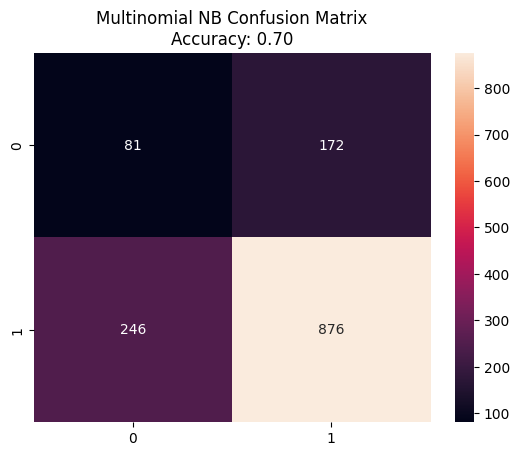

In [42]:
mult = MultinomialNB()
mult.fit(X_train_mult, y_train_mult)
y_pred_mult = mult.predict(X_test_mult)
acc_mult = accuracy_score(y_test_mult, y_pred_mult)
cm_mult = confusion_matrix(y_test_mult, y_pred_mult)

ax = plt.subplot()
sns.heatmap(cm_mult, annot=True, fmt="d", ax=ax)
ax.set_title(f'Multinomial NB Confusion Matrix\nAccuracy: {acc_mult:.2f}')
plt.show()

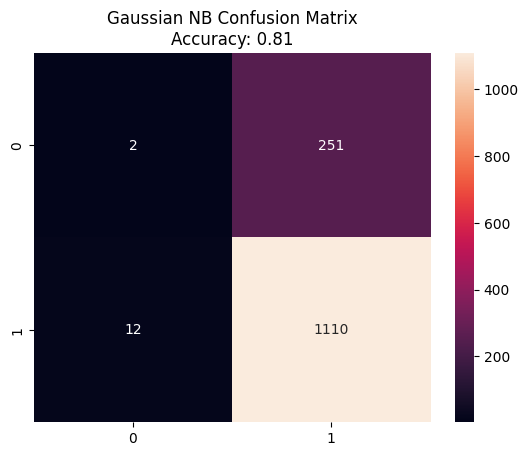

In [43]:

gauss = GaussianNB()
gauss.fit(X_train_gauss, y_train_gauss)
y_pred_gauss = gauss.predict(X_test_gauss)
acc_gauss = accuracy_score(y_test_gauss, y_pred_gauss)
cm_gauss = confusion_matrix(y_test_gauss, y_pred_gauss)

ax = plt.subplot()
sns.heatmap(cm_gauss, annot=True, fmt="d", ax=ax)
ax.set_title(f'Gaussian NB Confusion Matrix\nAccuracy: {acc_gauss:.2f}')
plt.show()

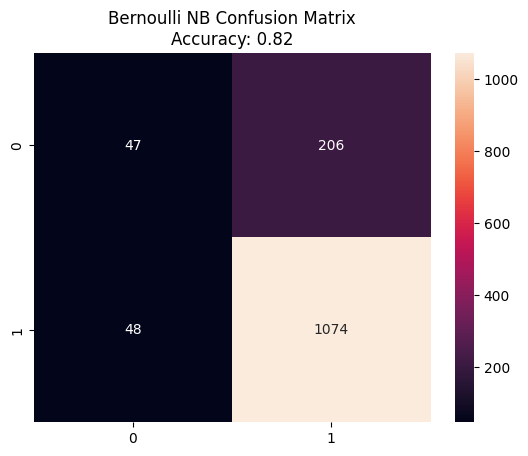

In [44]:
bern = BernoulliNB()
bern.fit(X_train_bern, y_train_bern)
y_pred_bern = bern.predict(X_test_bern)
acc_bern = accuracy_score(y_test_bern, y_pred_bern)
cm_bern = confusion_matrix(y_test_bern, y_pred_bern)

ax = plt.subplot()
sns.heatmap(cm_bern, annot=True, fmt="d", ax=ax)
ax.set_title(f'Bernoulli NB Confusion Matrix\nAccuracy: {acc_bern:.2f}')
plt.show()


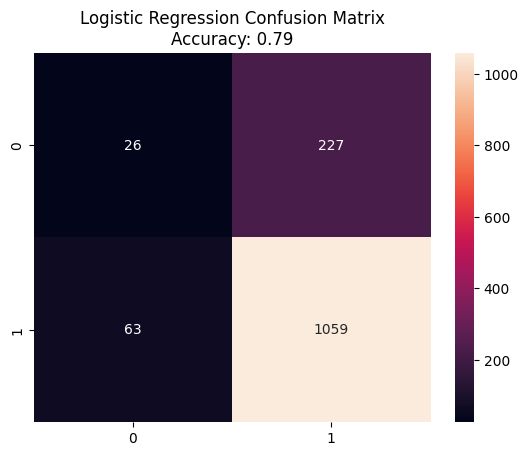

In [45]:
log = LogisticRegression(random_state=42, max_iter=1000)
log.fit(X_train_mult, y_train_mult)
y_pred_log = log.predict(X_test_mult)
acc_log = accuracy_score(y_test_mult, y_pred_log)
cm_log = confusion_matrix(y_test_mult, y_pred_log)

fig, ax = plt.subplots()
sns.heatmap(cm_log, annot=True, fmt="d", ax= ax)
ax.set_title(f'Logistic Regression Confusion Matrix\nAccuracy: {acc_log:.2f}')
plt.show()

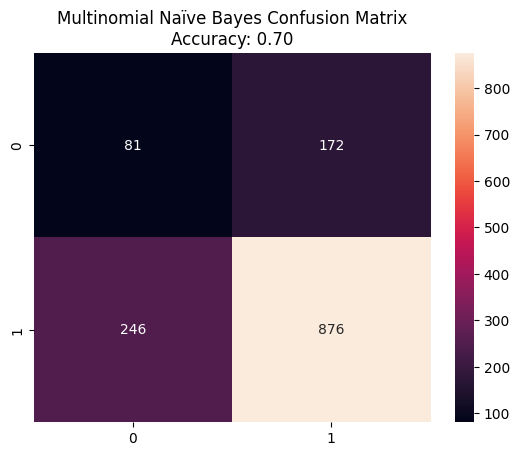

In [46]:
mult = MultinomialNB()
mult.fit(X_train_mult, y_train_mult)
y_pred_mult = mult.predict(X_test_mult)
acc_mult = accuracy_score(y_test_mult, y_pred_mult)
cm_mult = confusion_matrix(y_test_mult, y_pred_mult)

fig, ax = plt.subplots()
sns.heatmap(cm_mult, annot=True, fmt="d", ax=ax)
ax.set_title(f'Multinomial Naïve Bayes Confusion Matrix\nAccuracy: {acc_mult:.2f}')
plt.show()